1. Import required packages.
2. Load the data file


3 pts.

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/diamonds_train.csv"
prices = pd.read_csv(path)

4. Check the first 5 rows of data
5. Check for missing values.
6. Check data distribution by diamond shape using a histogram (bar graph).


2 pts.



In [ ]:
prices.head()

,shape,cut,color,clarity,weight_ct,fluorescence,length_width_ratio,polish,symmetry,girdle,cutlet,price,depth,table,length,width,height
0,Emerald,Very Good,D,SI1,1.70,Medium BlueInfo,1.29,Very Good,Very Good,Thin to Very Thick,None,13519,68.1,70.0,7.94,6.17,4.20
1,Round,Ideal,F,IF,1.07,FaintInfo,1.00,Excellent,Excellent,Thin to Slightly Thick,None,8842,62.4,56.0,6.52,6.54,4.07
2,Radiant,Very Good,G,VVS1,1.05,NoneInfo,1.20,Excellent,Excellent,Slightly Thick to Thick,None,4817,71.3,68.0,6.15,5.12,3.65
3,Round,Ideal,E,VVS2,2.85,NoneInfo,1.01,Excellent,Excellent,Medium to Slightly Thick,None,63161,62.7,58.0,9.06,9.00,5.66
4,Round,Ideal,D,SI1,0.35,NoneInfo,1.00,Excellent,Excellent,Medium to Slightly Thick,None,653,59.9,59.0,4.57,4.59,2.74


In [ ]:
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150546 entries, 0 to 150545
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   shape               150546 non-null  object 
 1   cut                 150546 non-null  object 
 2   color               150546 non-null  object 
 3   clarity             150546 non-null  object 
 4   weight_ct           150546 non-null  float64
 5   fluorescence        150546 non-null  object 
 6   length_width_ratio  150546 non-null  float64
 7   polish              150546 non-null  object 
 8   symmetry            150546 non-null  object 
 9   girdle              150546 non-null  object 
 10  cutlet              150546 non-null  object 
 11  price               150546 non-null  int64  
 12  depth               150546 non-null  float64
 13  table               150546 non-null  float64
 14  length              150546 non-null  float64
 15  width               150546 non-nul

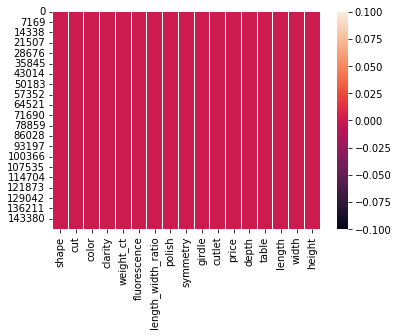

In [ ]:
sns.heatmap(prices.isnull(), cbar=True)

7. Build a pairplot to evaluate data distributions and correlations.
8. Comment whether the predictors: 1) have a linear relationship with the target (Price), 2) display constant variance (homoscedasticity), 3) contain outliers that need to be excluded.

5 pts.

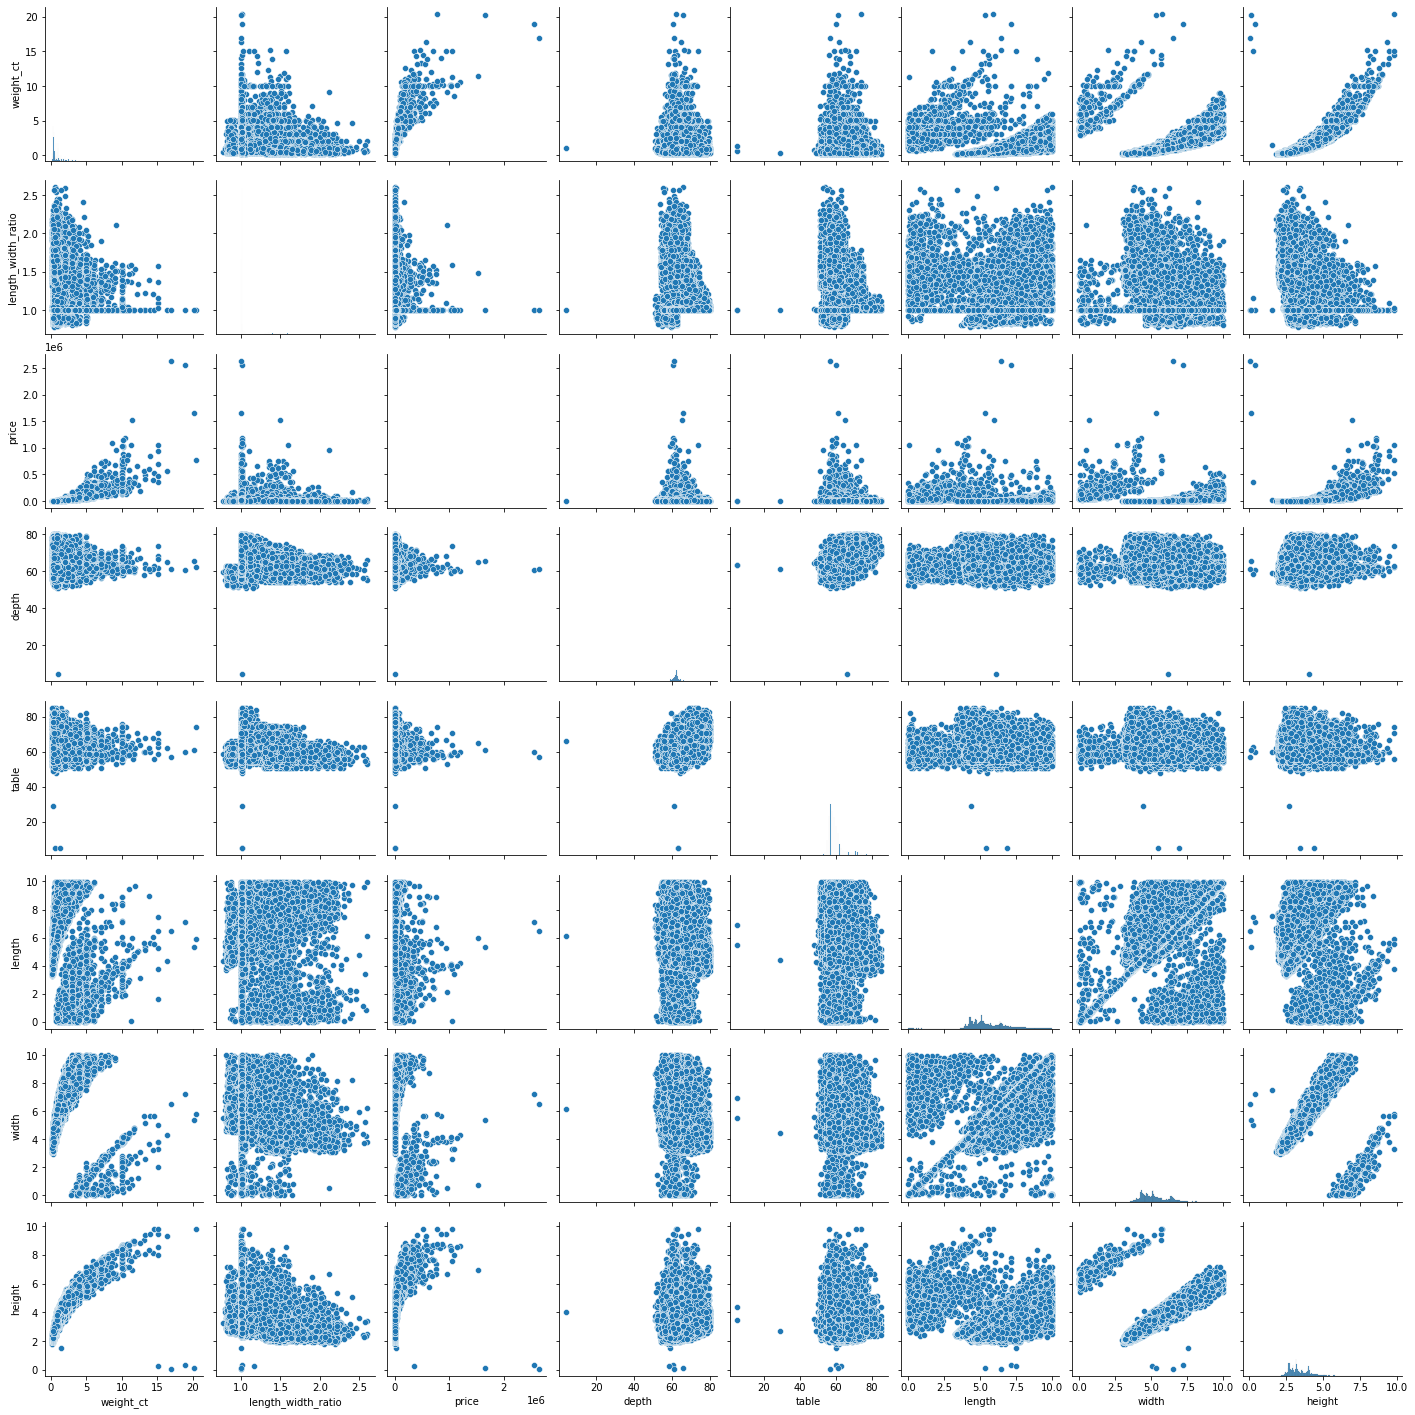

In [ ]:
sns.pairplot(prices)

In [ ]:
prices.describe()

,weight_ct,length_width_ratio,price,depth,table,length,width,height
count,150546.000000,150546.000000,1.505460e+05,150546.000000,150546.000000,150546.000000,150546.000000,150546.000000
mean,0.837971,1.084781,6.386796e+03,63.493332,59.694787,5.604533,5.351345,3.434914
std,0.781406,0.184781,2.502329e+04,3.769779,4.535643,1.457813,1.219303,0.793653
min,0.230000,0.780000,2.460000e+02,4.000000,5.000000,0.000000,0.000000,0.070000
25%,0.400000,1.000000,7.880000e+02,61.500000,57.000000,4.640000,4.480000,2.850000
50%,0.560000,1.010000,1.590000e+03,62.500000,58.000000,5.290000,5.100000,3.210000
75%,1.010000,1.020000,5.106000e+03,64.200000,61.000000,6.440000,6.140000,3.940000
max,20.450000,2.600000,2.641889e+06,80.000000,85.000000,9.990000,9.990000,9.810000


8.

1) Weight and height seem to have a positive correlation to price

2) The pairplot shows homoscedastify in that all of the data points share a variance when the predictor is changed

3) There are outliers in depths and tables

Comments:



9. Remove outliers if necessary.
10. Impute missing values as appropriate.

2 pts.


In [ ]:
prices.drop(prices[prices['depth'] < 50].index, inplace=True)
prices.drop(prices[prices['table'] < 50].index, inplace=True)

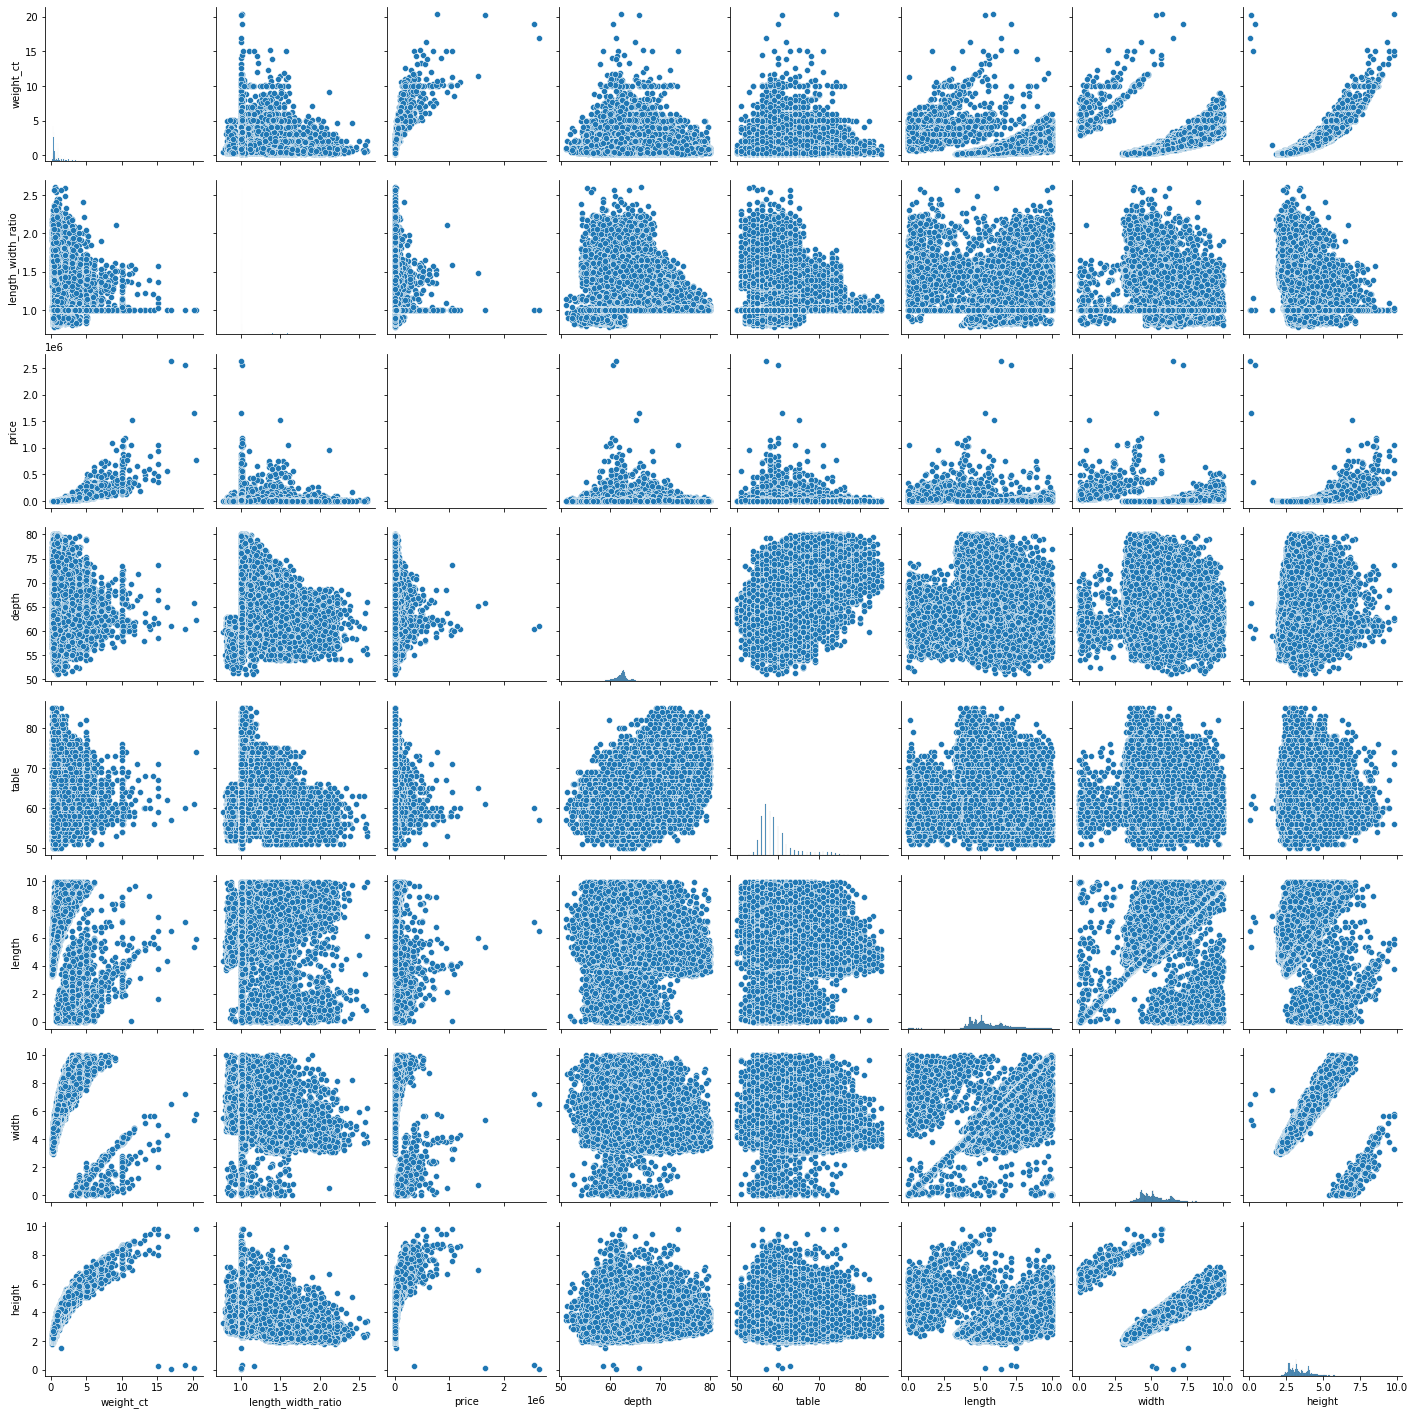

In [ ]:
sns.pairplot(prices)

10. There are no values to impute

11. Split data 70/30 into training and test datasets.
12. Build a multiple linear regression model to predict price for round diamonds.
13. Report R2, MAE, Max error, RMSE.
14. Comment on whether the model performance would be acceptable for practitioners.

8 pts.

In [ ]:
prices.columns

Index(['shape', 'cut', 'color', 'clarity', 'weight_ct', 'fluorescence',
       'length_width_ratio', 'polish', 'symmetry', 'girdle', 'cutlet', 'price',
       'depth', 'table', 'length', 'width', 'height'],
      dtype='object')

In [ ]:
predictors = ['shape', 'cut', 'color', 'clarity', 'weight_ct', 'fluorescence',
       'length_width_ratio', 'polish', 'symmetry', 'girdle', 'cutlet', 
       'depth', 'table', 'length', 'width', 'height']

In [ ]:
X = pd.get_dummies(prices[predictors], drop_first=True)
y = prices['price']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
re_prices = LinearRegression()

re_prices.fit(train_X, train_y)

LinearRegression()

In [ ]:
X.columns

Index(['weight_ct', 'length_width_ratio', 'depth', 'table', 'length', 'width',
       'height', 'shape_Cushion', 'shape_Emerald', 'shape_Heart',
       ...
       'girdle_Very Thin to Thin Faceted', 'girdle_Very Thin to Very Thick',
       'girdle_Very Thin to Very Thick Faceted',
       'girdle_Very Thin to Very Thin', 'cutlet_Medium', 'cutlet_None',
       'cutlet_Pointed', 'cutlet_Slightly Large', 'cutlet_Small',
       'cutlet_Very Small'],
      dtype='object', length=136)

In [ ]:
re_prices.intercept_

42229.97714134322

In [ ]:
re_prices.coef_

array([ 5.32457776e+04, -1.88221504e+04,  1.01632097e+03, -8.90322864e+01,
        1.73349427e+03, -1.65623184e+03, -3.05491923e+04,  2.98194332e+03,
       -4.26113043e+03,  2.29475067e+04,  1.27447844e+04,  7.85002486e+03,
        1.14005157e+04,  6.71287686e+03, -1.80741219e+03,  1.78689022e+04,
        1.48346189e+02, -1.50882833e+02,  5.62067726e-10, -4.19393735e+02,
       -1.13833799e+03, -1.24127554e+03, -1.64450813e+03, -2.77736445e+03,
       -3.93191795e+03, -5.41833395e+03, -7.28390790e+03, -2.22718029e+04,
       -2.54465921e+04, -2.64510449e+04, -2.39724909e+04, -2.48384773e+04,
       -2.32719979e+04, -2.35075010e+04, -7.15159560e+02, -3.33205511e+03,
        5.36162197e+02, -1.48829163e+03, -5.00304787e+02, -3.38049772e+03,
        3.78826872e+02, -2.47112577e+03, -7.47622459e+03, -2.22085400e+03,
       -6.17076957e+02, -2.33935255e+02,  3.83869175e+02,  7.30136793e+01,
        2.18278728e-11, -1.55398519e+03,  6.99204904e+03,  2.09559517e+03,
       -1.20374909e+02,  

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score

In [ ]:
pred_y = re_prices.predict(valid_X)

In [ ]:
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

Regression model performance evaluation
R2:  0.6884806893247717
MAE:  4305.318592938974
RMSE:  14291.367338585456
Max error:  1649108.895597472


14. with an R2 of .68 the model would be acceptable but not the most perfect model especially with such a high max error.

15. Use the model to predict prices in the diamond_score.csv dataset
16. Compare predicted and actual prices for the diamonds in the diamond_score.csv dataset

10 pts.

In [ ]:
path1 = "/content/drive/MyDrive/diamonds_score.csv"
score = pd.read_csv(path1)

In [ ]:
score.columns

Index(['shape', 'cut', 'color', 'clarity', 'weight_ct', 'fluorescence',
       'length_width_ratio', 'polish', 'symmetry', 'girdle', 'cutlet', 'price',
       'depth', 'table', 'length', 'width', 'height'],
      dtype='object')

In [ ]:
df1 = prices
df2 = score
df3 = pd.concat([df1, df2])

In [ ]:
df3.head()

,shape,cut,color,clarity,weight_ct,fluorescence,length_width_ratio,polish,symmetry,girdle,cutlet,price,depth,table,length,width,height
0,Emerald,Very Good,D,SI1,1.70,Medium BlueInfo,1.29,Very Good,Very Good,Thin to Very Thick,None,13519,68.1,70.0,7.94,6.17,4.20
1,Round,Ideal,F,IF,1.07,FaintInfo,1.00,Excellent,Excellent,Thin to Slightly Thick,None,8842,62.4,56.0,6.52,6.54,4.07
2,Radiant,Very Good,G,VVS1,1.05,NoneInfo,1.20,Excellent,Excellent,Slightly Thick to Thick,None,4817,71.3,68.0,6.15,5.12,3.65
3,Round,Ideal,E,VVS2,2.85,NoneInfo,1.01,Excellent,Excellent,Medium to Slightly Thick,None,63161,62.7,58.0,9.06,9.00,5.66
4,Round,Ideal,D,SI1,0.35,NoneInfo,1.00,Excellent,Excellent,Medium to Slightly Thick,None,653,59.9,59.0,4.57,4.59,2.74


In [ ]:
df3.shape

(150556, 17)

In [ ]:
df3.columns

Index(['shape', 'cut', 'color', 'clarity', 'weight_ct', 'fluorescence',
       'length_width_ratio', 'polish', 'symmetry', 'girdle', 'cutlet', 'price',
       'depth', 'table', 'length', 'width', 'height'],
      dtype='object')

In [ ]:
dummy_df3 = pd.get_dummies(df3, drop_first = True)

In [ ]:
X_new = dummy_df3.drop(['price'], axis = 1)
y_new = dummy_df3['price']

In [ ]:
train_new = X_new.iloc[:-10,:]
score_new = X_new.iloc[-10:,:]

In [ ]:
re_prices.fit(X_new, y_new)

LinearRegression()

In [ ]:
y_score_pred = re_prices.predict(score_new)

In [ ]:
print(y_score_pred)

[ 2398.58942071  -316.70480144  2869.33065686  5310.94504632
 30748.38383566  8902.80401355 15469.74039592  4016.41709864
  3580.1308026   3008.4788702 ]


16. I have tried many way but cannot figure this out I do not think my model did too well